
<font size="8"> **Movie Recommendation 2022**</font>

© Explore Data Science Academy
** **
<br />

<img src="https://explore-datascience.net/images/images_admissions2/main-logo.jpg" width=600 height=100 />

<br />

** **

### Team Members



*   List item
*   List item
*   List item
*   List item
*   List item
*   List item


### Honour Code

We Team Cbb5, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview:
In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

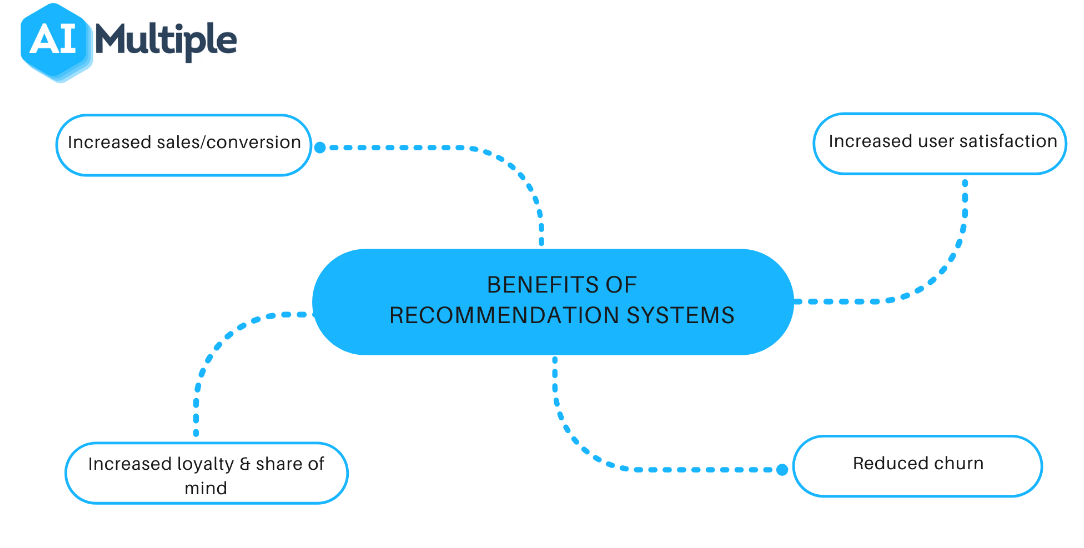

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Understand the Data</a>

<a href=#four>4. Clean Data (EDA)</a>

<a href=#five>5. Data Preprocessing (EDA)</a> 

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Data Engineering</a>

<a href=#eight>8. Model creation </a>

<a href=#nine>9. Model Improvements</a>

<a href=#ten>10. Model Evaluation</a>

<a href=#eleven>11. Discuss chosen methods logic</a>

<a href=#twelve>12. Conclusions</a>

<a href=#thirteen>13. Recommendations</a>




 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

## COMET

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

<a id="three"></a>
# 3. Understand the Data

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="four"></a>
# 4. Cleaning Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="five"></a>
# 5.  Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="six"></a>
# 6. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


<a id="seven"></a>
# 7. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section the data is processed further, creating new features - as identified in the EDA phase. |

---

<a id="eight"></a>
# 8. Model Creation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, NLP models are created inorder to accurately predict the sentiment of tweets. |

---

<a id="nine"></a>
# 9.  Model Improvements
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="ten"></a>
# 10.  Model Evaluation |
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="eleven"></a>
# 11. Discuss chosen methods logic
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="twelve"></a>
# 12. Conclusions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

* Balanced data significantly improved model performance.
* Support vector machines achieved the highest F1 test score, Hence Support vector machines was the best performing model.
* This conclusion is supported by literature which states that SVM's are known to be one of the best supervised learning models for text classification problems.


<a id="thirteen"></a>
# 13. Recommendations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

# Submission code